In [4]:
from matplotlib import pyplot as plt
import json 

In [7]:
CHK_PTS = [19, 39, 59, 79, 99, 119, 139, 159, 179, 199, 219, 239, 259]
LRS = ['5e-3', '5e-4', '5e-5', '5e-3', '5e-4', '5e-5', '5e-3', '5e-4', '5e-5']
NAMES = ['dinov2', 'dinov2', 'dinov2', 'vae', 'vae', 'vae', 'slimnet', 'slimnet', 'slimnet']
VAL_FILES = ['light_x_minus', 'light_x_plus', 'light_y_minus', 'light_y_plus', 'light_z_minus', 'light_z_plus']

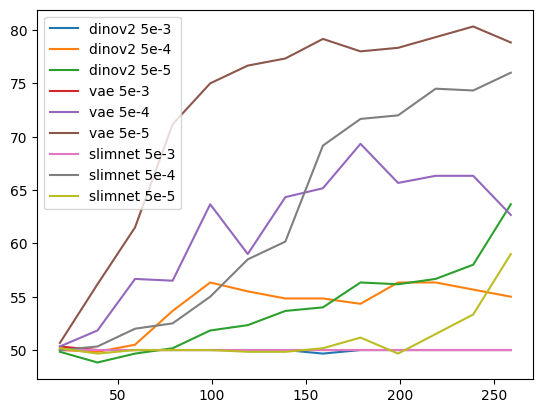

In [8]:

outputs = []
for version in range(9):
    lr = LRS[version]
    name = NAMES[version]
    current_corrected = []
    for chk_pt in CHK_PTS:
        count_corrected = 0
        for val_dir in VAL_FILES:
            dir_path = f"../../output/20240703/val_axis/{name}/{lr}/chk{chk_pt}/{val_dir}/lightning_logs/version_0/"
            with open(dir_path + '/scores.json') as f:
                data = json.load(f)
                count_corrected += len(data['corrected'])
        count_corrected /= 6
        current_corrected.append(count_corrected)
    outputs.append((name, lr, current_corrected))
    plt.plot(CHK_PTS, current_corrected, label=f"{name} {lr}")
plt.legend()
plt.show()